<a href="https://colab.research.google.com/github/JoDeMiro/TimeSeriesLearn/blob/main/19_TSLearn_Model_Persistence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Model Persistence

Many tslearn models can be saved to disk and used for predictions
at a later time. This can be particularly useful when a model takes
a long time to train.

**Available formats:** hdf5, json, pickle

Save a model to disk::

    model.to_<format>

Load a model from disk::

    model.from_<format>

**Basic usage**

.. code-block:: python

    # Instantiate a model
    model = ModelClass(<hyper-parameters>)

    # Train the model
    model.fit(X_train)

    # Save the model to disk
    model.to_hdf5('./trained_model.hdf5')

    # Load model from disk
    model.from_hdf5('./trained_mode.hdf5')

    # Make predictions
    y = model.predict(X_test)

<div class="alert alert-info"><h4>Note</h4><p>For the following models the training data are saved to disk and
    may result in a large model file if the trainig dataset is large:
    ``KNeighborsTimeSeries``, ``KNeighborsTimeSeriesClassifier``, and
    ``KernelKMeans``</p></div>


In [1]:
!pip install -q tslearn

     |████████████████████████████████| 793 kB 8.3 MB/s 


0.009 --> 0.009 --> 0.008 --> 0.008 --> 0.008 --> 0.007 --> 0.007 --> 0.006 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 


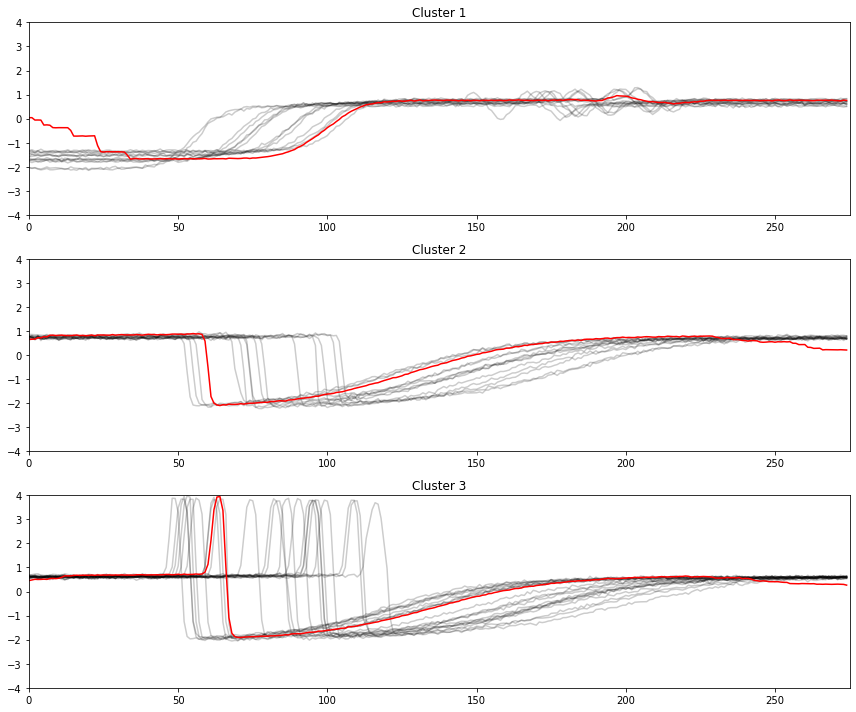

In [4]:
# Example using KShape

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

# Keep first 3 classes
X_train = X_train[y_train < 4]
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
sz = X_train.shape[1]

# Instantiate k-Shape model
ks = KShape(n_clusters=3, verbose=True, random_state=seed)

# Train
ks.fit(X_train)

# Save model
ks.to_hdf5('./ks_trained.hdf5')

# Load model
trained_ks = KShape.from_hdf5('./ks_trained.hdf5')

# Use loaded model to make predictions
y_pred = trained_ks.predict(X_train)

plt.figure(figsize=(12, 10))
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()